<a href="https://colab.research.google.com/github/shksuraj/Capstone-project-ML-classification/blob/main/Cardio_Vascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Mounting google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
#Loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Capstone Project 3 - Cardio Vascular Disease prediction/data_cardiovascular_risk.csv')

In [8]:
#Viewing first ten rows
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [9]:
#exploring datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [10]:
#summary of numerical features
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
#finding duplicate records if any
len(df[df.duplicated()])

0

In [12]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# dropping the feature named 'id' which is not necessary for our study
df.drop('id',axis=1,inplace=True)

In [14]:
# missing values in each feature
df.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [ ]:
#NUll values are present in features named 'glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate'


In [15]:
#Exploratory Data Analysis
#Univariate Analysis:

# numeric features in our data set
# Lets check the discrete and continuous features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


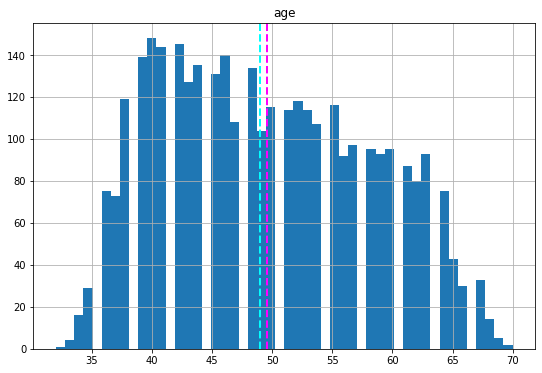

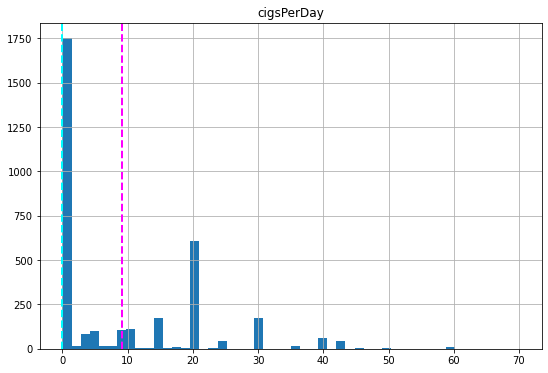

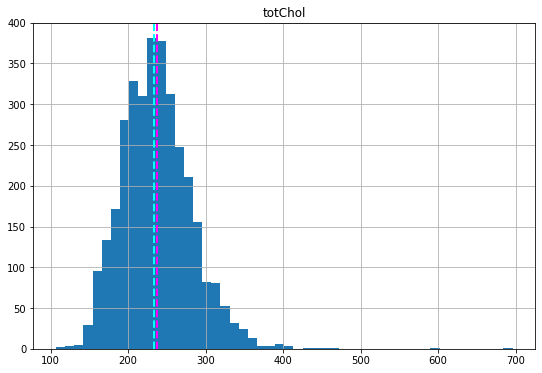

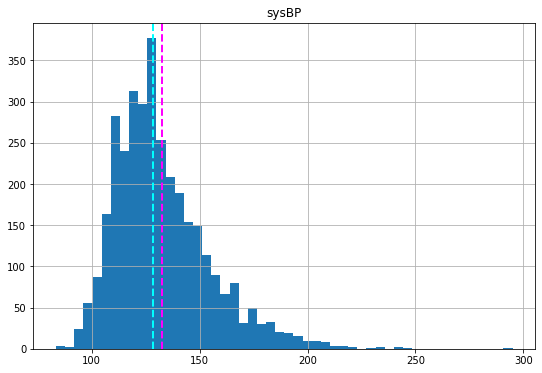

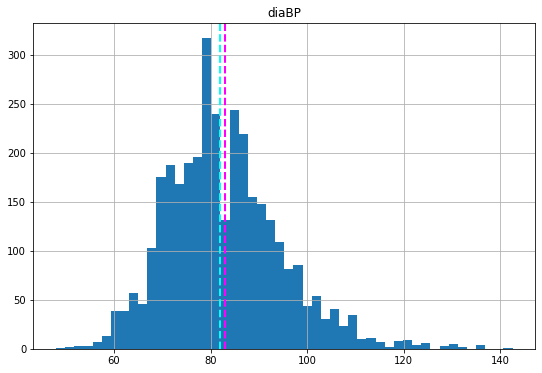

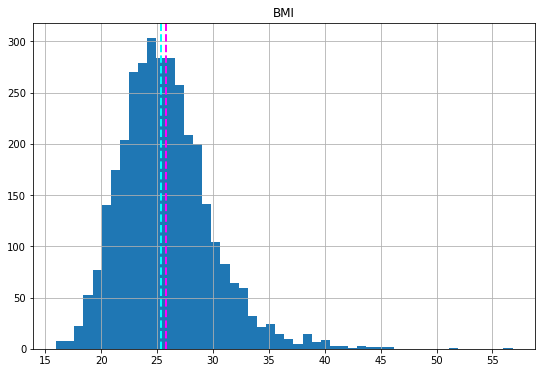

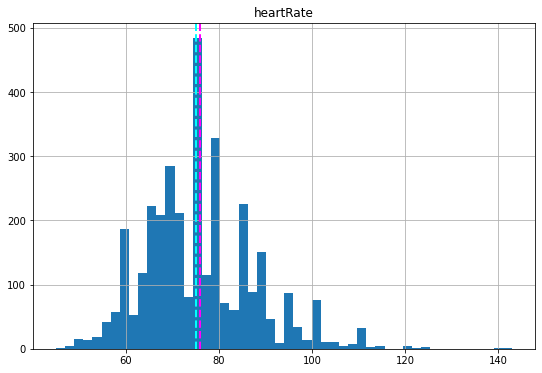

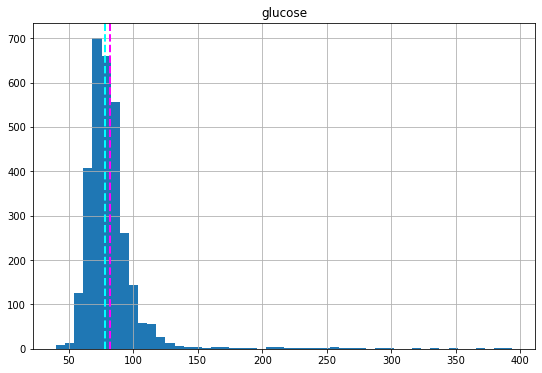

In [17]:
# ploting a bar plot for each numerical feature

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)     
    ax.set_title(col)
plt.show()

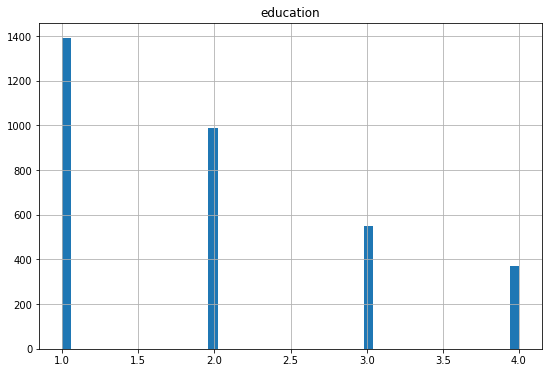

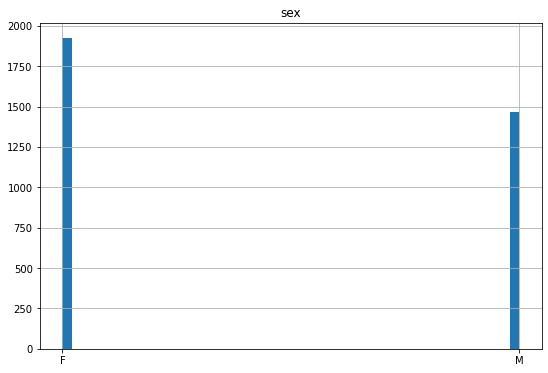

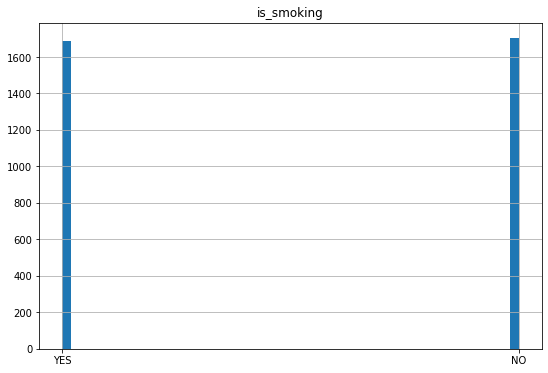

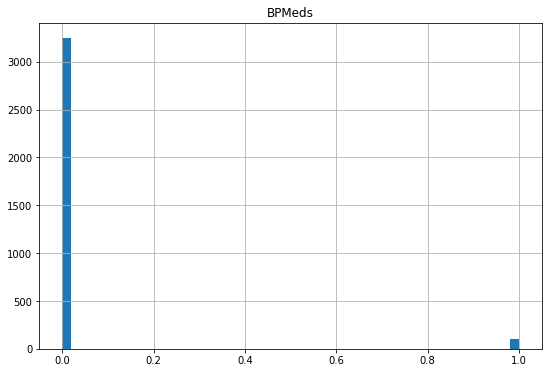

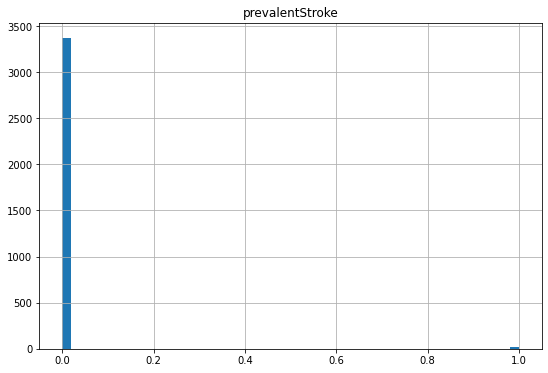

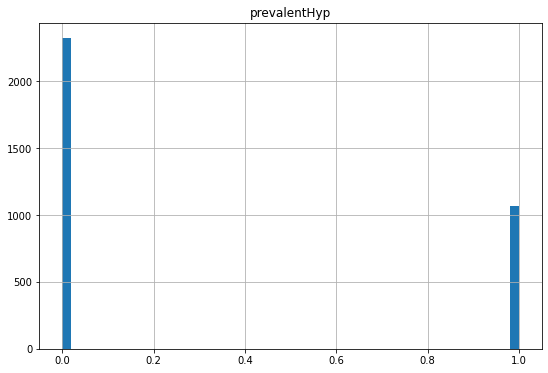

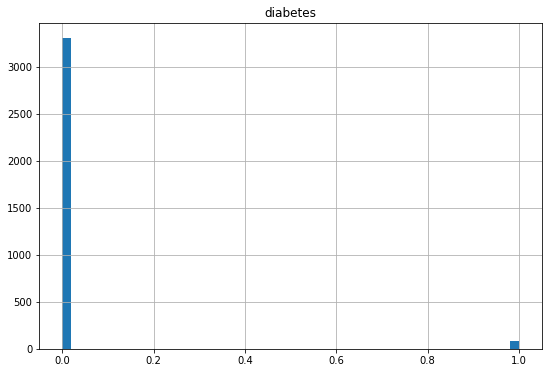

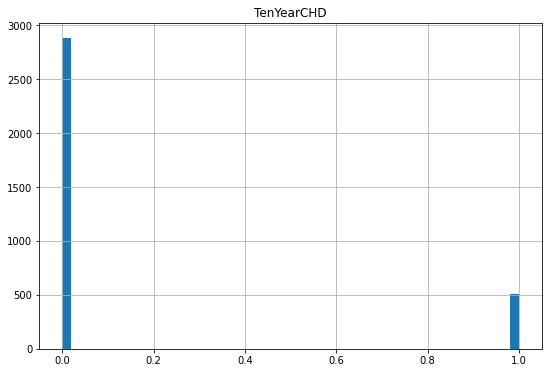

In [18]:
# ploting a bar plot for each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)    
    ax.set_title(col)
plt.show()

In [ ]:
Inferences:
People in our dataset are devided into four levels in education point of view and the level 1 people are large as levels increse to four the number is decreased.
Females are more compared number of males in our dataset.
number of smokers and non-smokers are equal.
only few people on blood pressure medication in our dataset.
only few people had previously had a stroke.
patients were hypertensive more in number compered to patients were not hypertensive.
only few people had diabates.
In our dataset, less percentage of people were prone to cardiac arrest in coming ten years.
we have imbalanced dataset (one of the target class labels’ numbers of observation is significantly lower than other class labels).
If our target variable is imbalnced then it would be better to pick our metrics wisely like recall or F1 score.

In [ ]:
Bivariate Analisis:

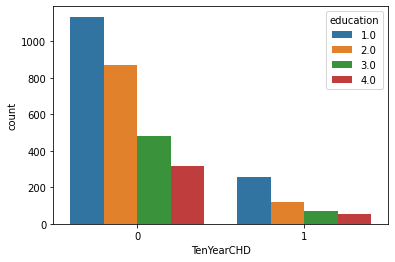

In [19]:
# count plot of education levels people having diseases
sns.countplot(x ='TenYearCHD', hue ='education', data = df)


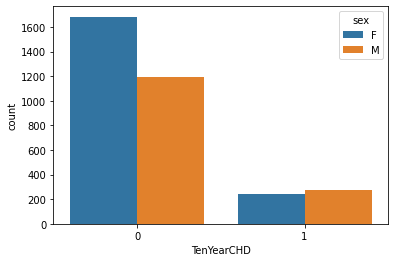

In [20]:
# count of males and females having heart disease
# count plot on two categorical variable
sns.countplot(x ='TenYearCHD', hue = "sex", data = df)

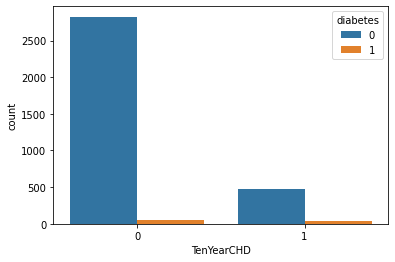

In [21]:
# count plot of diabatic people having diseases
sns.countplot(x ='TenYearCHD', hue ='diabetes', data = df)

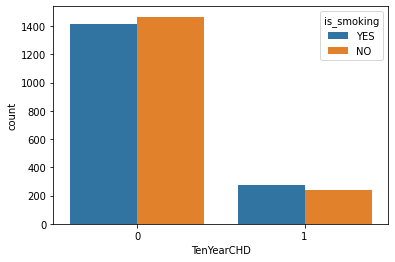

In [22]:
# count plot of smoking people having diseases
sns.countplot(x ='TenYearCHD', hue ='is_smoking', data = df)

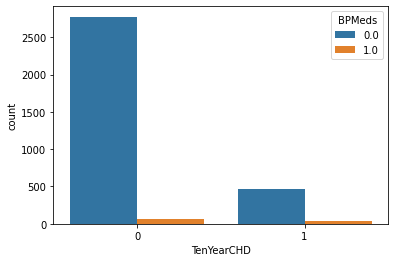

In [23]:
# count plot of BP Medication people having diseases
sns.countplot(x ='TenYearCHD', hue ='BPMeds', data = df)

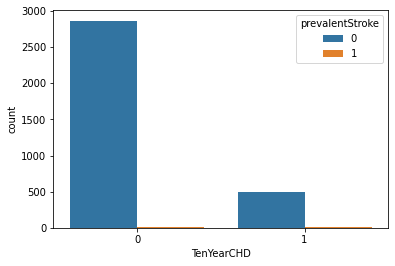

In [24]:
# count plot of prevalent stroke people having diseases
sns.countplot(x ='TenYearCHD', hue ='prevalentStroke', data = df)

In [26]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

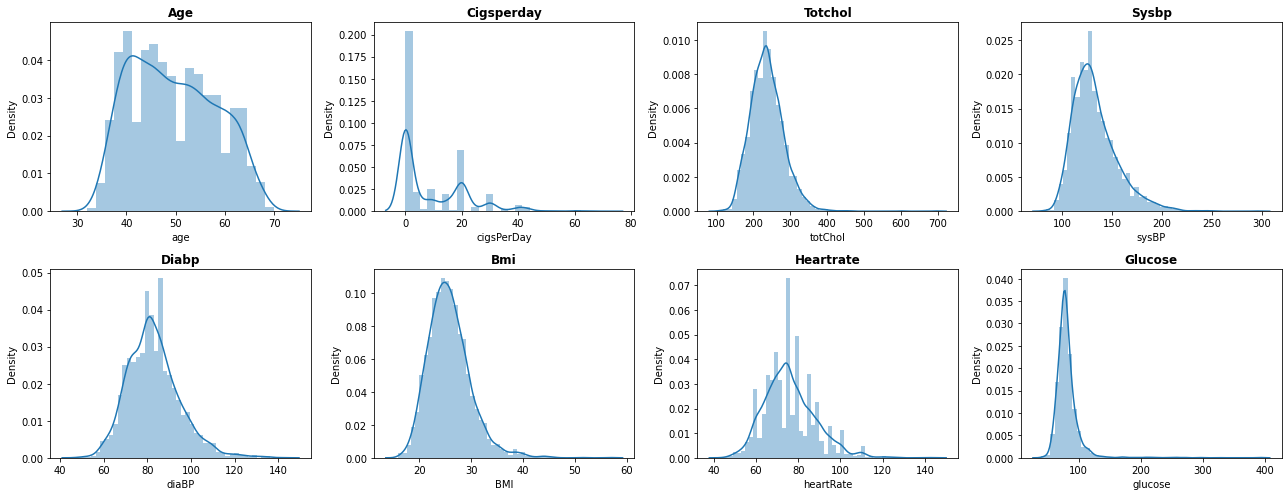

In [27]:
# Visualizing the distributions.
plt.figure(figsize=(18,7))
for n,column in enumerate(numeric_features):
  plt.subplot(2, 4, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

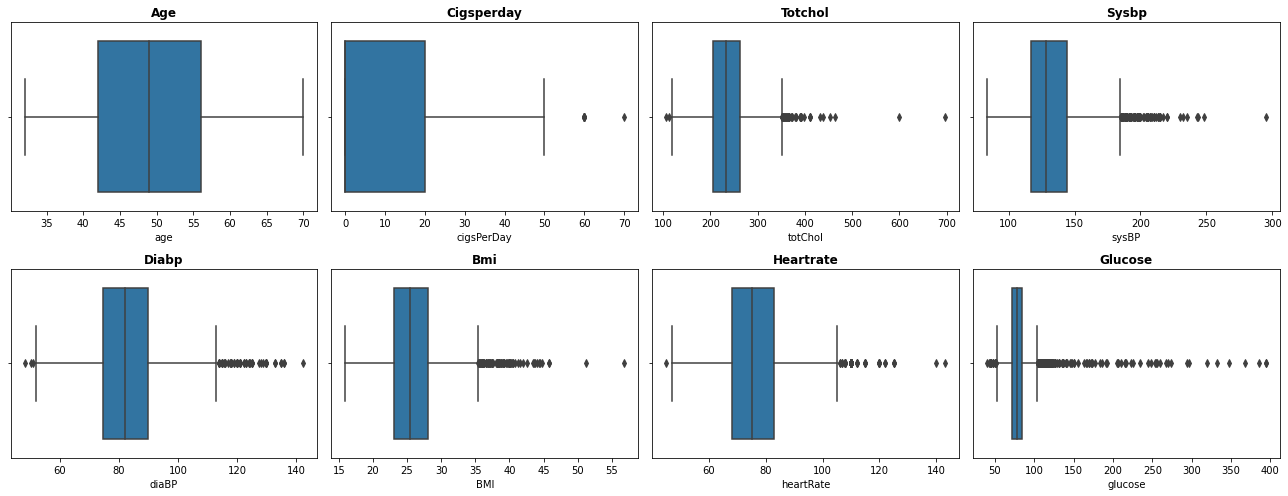

In [28]:
# using box plot to see outliers in each numerical feature in our data
# Visualizing the distributions.
plt.figure(figsize=(18,7))
for n,column in enumerate(numeric_features):
  plt.subplot(2, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
inferences:
Age is ranging from 30 to 70.
cigsperday is ranging from 0 to 70.
total cholestral is ranging from 100 to 700.
sysbp is ranging from 100 to 300.
diabp is ranging from 40 to 140.
BMI is ranging from 15 to 55.
heart rate is ranging from 40 to 140.
glucose level is from 40 to 400.
we can see outliers in our dataset
outliers in total cholestral, systolic blood pressure, diastolic blood pressure, body mass index, heartrate and glucose level.

In [ ]:
Outliers Removal: